In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('euromillions_Fusion.csv',sep=';', encoding='ISO-8859-1')

In [3]:
df.head()

,annee_numero_de_tirage,jour_de_tirage,date_de_tirage,numï¿½ro_de_tirage_dans_le_cycle,date_de_forclusion,boule_1,boule_2,boule_3,boule_4,boule_5,...,rapport_du_rang7_Etoile+,nombre_de_gagnant_au_rang8_Etoile+,rapport_du_rang8_Etoile+,nombre_de_gagnant_au_rang9_Etoile+,rapport_du_rang9_Etoile+,nombre_de_gagnant_au_rang10_Etoile+,rapport_du_rang10_Etoile+,numero_My_Million,numero_Tirage_Exceptionnel_Euro_Million,Unnamed: 75
0,20244007,MARDI,23/01/2024,1,24/03/2024,48,23,14,50,39,...,"4,4",12899,"11,7",30850,"2,7",308046,"2,4",KR 537 5327,NaN,NaN
1,20244006,VENDREDI,19/01/2024,1,20/03/2024,50,27,28,48,44,...,4,18046,"11,1",42691,"2,6",424081,"2,3",QE 911 6397,NaN,NaN
2,20244005,MARDI,16/01/2024,7,17/03/2024,18,21,33,45,10,...,"4,4",13958,"12,7",39974,"2,5",328733,"2,7",CU 208 5890,NaN,NaN
3,20244004,VENDREDI,12/01/2024,6,13/03/2024,18,16,17,49,45,...,"4,3",18344,"12,4",46653,"2,7",427062,"2,6",RT 208 4085,NaN,NaN
4,20244003,MARDI,09/01/2024,5,10/03/2024,12,9,2,39,40,...,"3,8",15703,"10,8",41373,"2,3",339112,"2,4",LN 958 0675,NaN,NaN


In [4]:
column_names = df.columns
column_names

Index(['annee_numero_de_tirage', 'jour_de_tirage', 'date_de_tirage',
       'numï¿½ro_de_tirage_dans_le_cycle', 'date_de_forclusion', 'boule_1',
       'boule_2', 'boule_3', 'boule_4', 'boule_5', 'etoile_1', 'etoile_2',
       'boules_gagnantes_en_ordre_croissant',
       'etoiles_gagnantes_en_ordre_croissant',
       'nombre_de_gagnant_au_rang1_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang1_Euro_Millions_en_europe',
       'rapport_du_rang1_Euro_Millions',
       'nombre_de_gagnant_au_rang2_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang2_Euro_Millions_en_europe',
       'rapport_du_rang2_Euro_Millions',
       'nombre_de_gagnant_au_rang3_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang3_Euro_Millions_en_europe',
       'rapport_du_rang3_Euro_Millions',
       'nombre_de_gagnant_au_rang4_Euro_Millions_en_france',
       'nombre_de_gagnant_au_rang4_Euro_Millions_en_europe',
       'rapport_du_rang4_Euro_Millions',
       'nombre_de_gagnant_au_rang5_

In [5]:
df_ligth = df[['boule_1','boule_2','boule_3','boule_4','boule_5','etoile_1','etoile_2']]

In [6]:
test = df[['boules_gagnantes_en_ordre_croissant','etoiles_gagnantes_en_ordre_croissant']]

In [7]:
test.head(2)

,boules_gagnantes_en_ordre_croissant,etoiles_gagnantes_en_ordre_croissant
0,-14-23-39-48-50-,-3-12-
1,-27-28-44-48-50-,-7-12-


In [8]:
df_ligth.head()

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,48,23,14,50,39,12,3
1,50,27,28,48,44,7,12
2,18,21,33,45,10,12,8
3,18,16,17,49,45,9,12
4,12,9,2,39,40,3,1


In [9]:
for column in df_ligth.columns:
    counts = df_ligth[column].value_counts()
#    print(f"\nDistribution of {column}:\n{counts}")

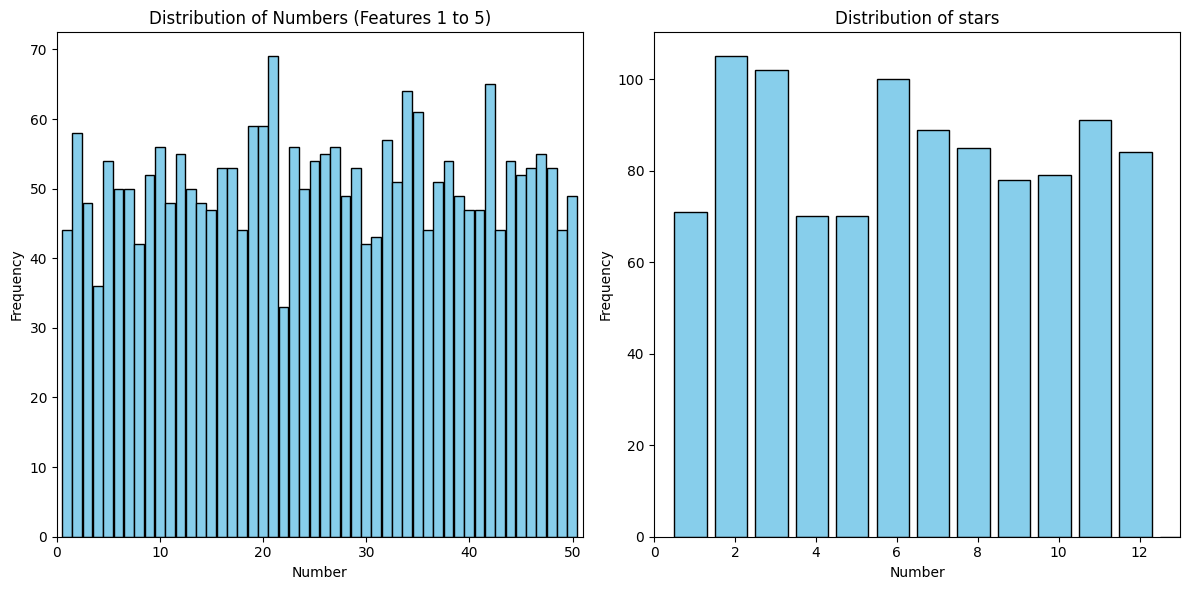

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

bin_edges = [edge - 0.5 for edge in range(df_ligth.min().min(), df_ligth.max().max() + 2)]
# Histogram for features 1 to 5
axes[0].hist(df_ligth.iloc[:, :5].values.flatten(), bins=bin_edges, color='skyblue', edgecolor='black', width=0.95)
axes[0].set_title('Distribution of Numbers (Features 1 to 5)')
axes[0].set_xlabel('Number')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim([0, 51])

# Histogram for features 6 and 7
hist_2 = axes[1].hist(df_ligth.iloc[:, 5:].values.flatten(), bins=bin_edges, color='skyblue', edgecolor='black', width=0.8)
axes[1].set_title('Distribution of stars')
axes[1].set_xlabel('Number')
axes[1].set_ylabel('Frequency')

# Customize x-axis labels for the second subplot
# axes[1].set_xticks(hist_2[1])
# axes[1].set_xticklabels(hist_2[1])
axes[1].set_xlim([0, 13])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Select features 1 to 5
features_1_to_5 = df_ligth.iloc[:, :5]
# Check if at least one value in each row is less than 10
at_least_one_less_than_10 = (features_1_to_5 < 10).any(axis=1)

# Count the number of rows where at least one value is less than 10
count_rows_at_least_one_less_than_10 = at_least_one_less_than_10.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 10 appears numbers: {count_rows_at_least_one_less_than_10:.2f}%')

% of times a value < 10 appears numbers: 61.91%


In [12]:
# Check if at least one value in each row is less than 20
at_least_one_less_than_20 = ((features_1_to_5 >= 10) & (features_1_to_5 < 20)).any(axis=1)

# Count the number of rows where at least one value is less than 20
count_rows_at_least_one_less_than_20 = at_least_one_less_than_20.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 20 appears numbers: {count_rows_at_least_one_less_than_20:.2f}%')

% of times a value < 20 appears numbers: 69.73%


In [13]:
# Check if at least one value in each row is less than 30
at_least_one_less_than_30 = ((features_1_to_5 >= 20) & (features_1_to_5 < 30)).any(axis=1)

# Count the number of rows where at least one value is less than 30
count_rows_at_least_one_less_than_30 = at_least_one_less_than_30.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 30 appears numbers: {count_rows_at_least_one_less_than_30:.2f}%')

% of times a value < 30 appears numbers: 71.09%


In [14]:
# Check if at least one value in each row is less than 40
at_least_one_less_than_40 = ((features_1_to_5 >= 30) & (features_1_to_5 < 40)).any(axis=1)

# Count the number of rows where at least one value is less than 40
count_rows_at_least_one_less_than_40 = at_least_one_less_than_40.sum()/df_ligth.shape[0]*100

print(f'% of times a value < 40 appears numbers: {count_rows_at_least_one_less_than_40:.2f}%')

% of times a value < 40 appears numbers: 70.31%


In [15]:
# Check if at least one value in each row is less than 50
at_least_one_less_than_50 = ((features_1_to_5 >= 40) & (features_1_to_5 <= 50)).any(axis=1)

# Count the number of rows where at least one value is less than 50
count_rows_at_least_one_less_than_40 = at_least_one_less_than_50.sum()/df_ligth.shape[0]*100

print(f'% of times a value <= 50 appears numbers: {count_rows_at_least_one_less_than_40:.2f}%')

% of times a value <= 50 appears numbers: 73.63%


In [16]:
# Check if at least one value in each row is less than 50
at_least_one_less_than_25 = ((features_1_to_5 <= 25)).any(axis=1)

# Count the number of rows where at least one value is less than 50
count_rows_at_least_one_less_than_25 = at_least_one_less_than_25.sum()/df_ligth.shape[0]*100

print(f'% of times a value <= 25 appears numbers: {count_rows_at_least_one_less_than_25:.2f}%')

% of times a value <= 25 appears numbers: 98.05%


In [17]:
Number50 = (features_1_to_5 == 50).any(axis=1)
Number50 = Number50.sum()/df_ligth.shape[0]*100
print(f'% 50: {Number50:.2f}%')

% 50: 9.57%


In [18]:
Number1 = (features_1_to_5 == 1).any(axis=1)
Number1 = Number1.sum()/df_ligth.shape[0]*100
print(f'% 1: {Number1:.2f}%')

% 1: 8.59%


In [19]:
# Count the number of values less than 24 for each row in features 1 to 5
count_less_than_25_per_row = (features_1_to_5 <= 25).sum(axis=1)

# Print the count for each row
print('Number of values less than 25 for each row:')
print(count_less_than_25_per_row)


Number of values less than 25 for each row:
0      2
1      0
2      3
3      3
4      3
      ..
507    3
508    4
509    4
510    3
511    3
Length: 512, dtype: int64


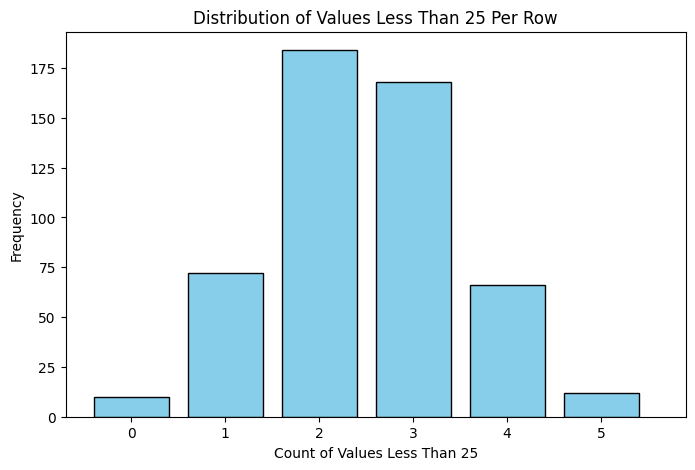

In [20]:
# Plot histogram
plt.figure(figsize=(8, 5))
bin_edges = [edge - 0.4 for edge in range(count_less_than_25_per_row.min(), count_less_than_25_per_row.max() + 2)]
plt.hist(count_less_than_25_per_row, bins=bin_edges, color='skyblue', edgecolor='black', width=0.8)
plt.title('Distribution of Values Less Than 25 Per Row')
plt.xlabel('Count of Values Less Than 25')
plt.ylabel('Frequency')
plt.xticks(range(6))
plt.show()

## Create Data with a windows

In [21]:
df_ligth.tail(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
510,16,10,46,39,6,8,11
511,9,19,26,31,6,12,11


In [22]:
df_ligth.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,48,23,14,50,39,12,3
1,50,27,28,48,44,7,12


In [23]:
df_ligth = df_ligth[::-1].reset_index(drop=True)

In [24]:
df_ligth.tail(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
510,50,27,28,48,44,7,12
511,48,23,14,50,39,12,3


In [25]:
# Function to create sequences for X and y
def create_sequences(data, length):
    X,Y = [],[]
    for i in range(len(data)-length):
        X.append(data.iloc[i:i+length, 0:data.shape[1]].values)
        Y.append(data.iloc[i+length, 0:data.shape[1]])

    return np.array(X),np.array(Y)

# Define the sequence length
rows_windows = 12

# Create sequences for X and y
X, y = create_sequences(df_ligth, rows_windows)

# Print the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (500, 12, 7)
y shape: (500, 7)


In [26]:
print(X[-1])

[[43 39 28 37  6  9 12]
 [ 2 13 37 38 48  9  5]
 [20 43 41 45 10 12  2]
 [14 49 34 44  6 12  4]
 [47 27  8 30 35  9 10]
 [ 2 36 19 37  3  9  6]
 [ 7 18 49 46 15 12 10]
 [18  4 39  7 50  8  3]
 [12  9  2 39 40  3  1]
 [18 16 17 49 45  9 12]
 [18 21 33 45 10 12  8]
 [50 27 28 48 44  7 12]]


In [27]:
print(y[-1])

[48 23 14 50 39 12  3]


In [28]:
# Scaled data because StandardScaler expected <= 2 dim
from sklearn.model_selection import train_test_split

X_scaled = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, shuffle=False)

In [29]:
print('X_train:', X_train.shape, 'X_test:', X_test.shape)
print('y_train:', y_train.shape, 'y_test:', y_test.shape)

X_train: (400, 12, 7) X_test: (100, 12, 7)
y_train: (400, 7) y_test: (100, 7)


##Model: TSLM

In [30]:
# # TODO: Train your LSTM model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Dropout
# from tensorflow.keras.optimizers import Adam
# # Define the model
# def my_LSTM(units, window_length, nb_label_feature, dropout):

#     model = Sequential()

#     # We add two layers of LSTM
#     model.add(LSTM(units=units, input_shape=(window_length, nb_label_feature), return_sequences=True))
#     #model.add(LSTM(units=units, dropout=dropout, return_sequences=True))
#     model.add(LSTM(units=units, return_sequences=False))
#     model.add(Dropout(dropout))
#     #model.add(LSTM(units=units, dropout=dropout, return_sequences=True))
#     model.add(LSTM(units=units, return_sequences=True))
#     model.add(Dropout(dropout))
#     model.add(LSTM(units=units, return_sequences=False))
#     # Output layer
#     model.add(Dense(units=nb_label_feature))

#     return model

In [30]:
# LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define the model
def my_LSTM(units, window_length, nb_label_feature, dropout):

    model = Sequential()

    # We add two layers of LSTM
    model.add(LSTM(units=units, input_shape=(window_length, nb_label_feature), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(0.2))
    # Output layer
    model.add(Dense(units=nb_label_feature))

    return model

In [31]:
def adapt_learning_rate(epoch):
    if epoch < 500:
      return 0.0005
    elif epoch < 1000:
      return 0.0001
    else:
      return 0.00005

my_lr_scheduler = LearningRateScheduler(adapt_learning_rate)

In [43]:
units = 64
window_length = rows_windows
nb_feature = X_train.shape[2]
DROPOUT = 0.2
BATCHSIZE = 32
EPOCHS = 36000
OPTIMIZER  = Adam(learning_rate=0.0001)#'rmsprop'#
# ACTIVATION = 'softmax'
LOSS = 'mean_squared_error'

In [44]:
model = my_LSTM(units, window_length, nb_feature, DROPOUT)
model.compile(loss = LOSS, optimizer = OPTIMIZER, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 64)            18432     
                                                                 
 dropout_4 (Dropout)         (None, 12, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 51911 (202.78 KB)
Trainable params: 51911 (202.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# # Define early stopping

early_stop = EarlyStopping(monitor='val_loss', patience=3000, restore_best_weights=True)

In [40]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE)
# history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_test, y_test), callbacks=[early_stop, my_lr_scheduler], verbose=1)
model.save('test'+'.h5')

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
13/13 [==============================] - 0s 8ms/step - loss: 6.5418 - accuracy: 0.8850
Epoch 44258/50000
13/13 [==============================] - 0s 8ms/step - loss: 5.9897 - accuracy: 0.8925
Epoch 44259/50000
13/13 [==============================] - 0s 9ms/step - loss: 6.4006 - accuracy: 0.8600
Epoch 44260/50000
13/13 [==============================] - 0s 8ms/step - loss: 6.5814 - accuracy: 0.8650
Epoch 44261/50000
13/13 [==============================] - 0s 8ms/step - loss: 6.4204 - accuracy: 0.8775
Epoch 44262/50000
13/13 [==============================] - 0s 8ms/step - loss: 6.6474 - accuracy: 0.9000
Epoch 44263/50000
13/13 [==============================] - 0s 9ms/step - loss: 6.4546 - accuracy: 0.8750
Epoch 44264/50000
13/13 [==============================] - 0s 8ms/step - loss: 6.2460 - accuracy: 0.8725
Epoch 44265/50000
13/13 [==============================] - 0s 8ms/step - loss: 6.3953 - accuracy: 0.

KeyboardInterrupt: 

In [ ]:
history2 = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_test, y_test))
model.save('test_valid_test'+'.h5')

Epoch 1/36000
13/13 [==============================] - 5s 83ms/step - loss: 628.0915 - accuracy: 0.1475 - val_loss: 665.2632 - val_accuracy: 0.1200
Epoch 2/36000
13/13 [==============================] - 0s 9ms/step - loss: 627.6855 - accuracy: 0.1550 - val_loss: 664.8353 - val_accuracy: 0.1000
Epoch 3/36000
13/13 [==============================] - 0s 9ms/step - loss: 627.2366 - accuracy: 0.1300 - val_loss: 664.3652 - val_accuracy: 0.0900
Epoch 4/36000
13/13 [==============================] - 0s 10ms/step - loss: 626.6262 - accuracy: 0.1700 - val_loss: 663.8006 - val_accuracy: 0.1200
Epoch 5/36000
13/13 [==============================] - 0s 12ms/step - loss: 625.9279 - accuracy: 0.1725 - val_loss: 663.0722 - val_accuracy: 0.1300
Epoch 6/36000
13/13 [==============================] - 0s 11ms/step - loss: 624.9363 - accuracy: 0.1825 - val_loss: 662.0385 - val_accuracy: 0.1500
Epoch 7/36000
13/13 [==============================] - 0s 9ms/step - loss: 623.4825 - accuracy: 0.2000 - val_loss:

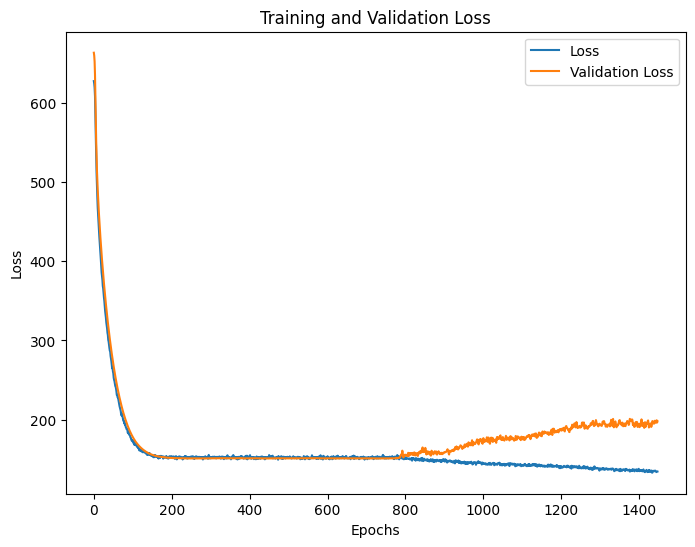

In [78]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 8))
plt.plot(history2.history['loss'], label='Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
predictions = model.predict(X_test)

4/4 [==============================] - 1s 4ms/step


In [57]:
idx = 4
print('y_pred', np.round(predictions[idx]).astype(int), '\ny_test', y_test[idx])

y_pred [40 10 33 17 32  7  6] 
y_test [42 34  7 23 48  1  3]
